In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [2]:
ds=pd.read_csv("C:\\Users\\asus\\Desktop\\ml\\advertising.csv")

In [3]:
ds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
ds.shape

(200, 4)

In [5]:
ds.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
ds.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


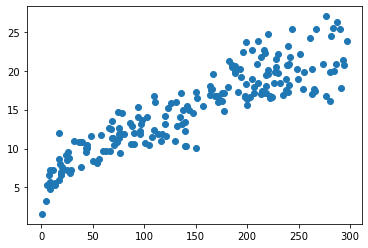

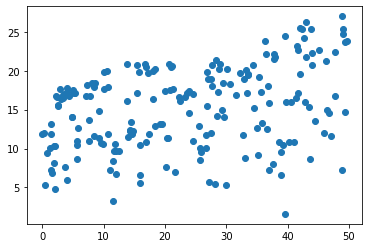

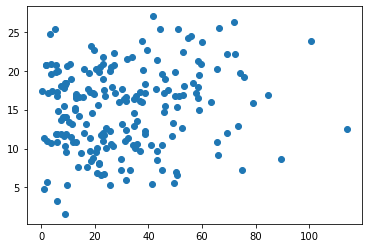

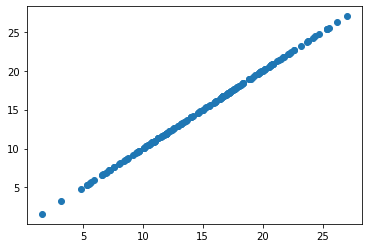

In [8]:
 y=ds['Sales']
for i in ds.columns:
    x=ds[i]
    plt.scatter(x,y)
    plt.show()

In [9]:
u=['TV']
s=ds[u]
v=ds.Sales

In [10]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(s,v)

LinearRegression()

In [11]:
print(lm.intercept_)
print(lm.coef_)

6.9748214882298925
[0.05546477]


In [12]:
6.9748214882298925+ 50*0.05546477

9.748059988229892

In [13]:
x_new=pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [14]:
lm.predict(x_new)

array([9.74806001])

In [15]:
x_new=pd.DataFrame({'TV':[ds.TV.min(),ds.TV.max()]})

In [16]:
x_new.head()

,TV
0,0.7
1,296.4


In [17]:
preds=lm.predict(x_new)
preds

array([ 7.01364683, 23.41457946])

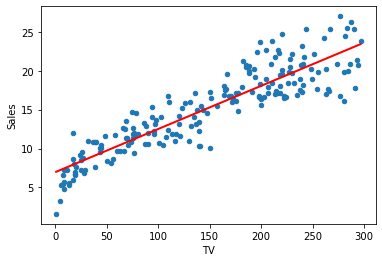

In [18]:
ds.plot(kind='scatter',x='TV',y='Sales')
plt.plot(x_new,preds,c='red',linewidth=2)

In [20]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Sales~TV',data=ds).fit()

In [21]:
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [22]:
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [24]:
lm.rsquared

0.8121757029987414

In [25]:
feature_cols=['TV','Radio','Newspaper']
x=ds[feature_cols]
y=ds.Sales
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.3,random_state=42)


In [26]:
lm=LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

4.625124078808655
[0.05444578 0.10700123 0.00033566]


In [27]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [28]:
print(lm.intercept_)
print(lm.coef_)

4.7437667015896885
[0.05358869 0.10270677 0.00793167]


In [29]:
predictions=lm.predict(xtrain)

In [30]:
predictions

array([21.11848606, 16.98365454, 12.88719008, 10.146882  , 20.81051619,
        7.60357179, 23.33666094,  7.17422814, 12.51775562, 10.19496565,
       11.13861029,  9.11455109, 16.90191934, 17.96632665, 15.89793301,
       18.17658466, 15.510838  , 19.17462667, 17.4985278 , 21.78302526,
       10.9293974 , 14.24097657, 10.85062985, 18.0766062 ,  9.94653599,
       17.50801696, 13.40425105, 23.58480318, 11.12777184, 23.56593295,
        7.47758575, 19.35934987, 25.15601575, 21.03343797, 18.74594783,
       16.46994473, 13.96563758, 11.38029263, 19.5072497 , 15.43483321,
       16.00504458, 10.34459768, 20.27054803, 12.52878796, 21.23675469,
       11.72760084,  9.07362481, 19.37602996, 15.76001999, 18.4291764 ,
        9.73610277, 21.5057118 , 24.78028021, 18.29999208, 18.86305778,
       14.99254145, 16.39431899,  9.071848  , 17.34382113, 21.0416217 ,
       18.13647832,  5.68991196,  6.20008935, 14.64403843, 19.34637486,
       18.921619  , 20.77018074, 23.16054093, 18.30811117, 21.08

In [31]:
predic=lm.predict(xtest)
predic

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [37]:
print(sqrt(mean_squared_error(ytest,predic)))

1.5942471691143594


In [40]:
lm=smf.ols(formula='Sales~TV +Radio+Newspaper',data=ds).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           8.13e-99
Time:                        16:59:57   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
import numpy as np
np.random.seed(12345)
nums=np.random.rand(len(ds))
mask_large=nums>0.5
ds['Size']='small'
ds.loc[mask_large,'Size']='large'
ds.head()

,TV,Radio,Newspaper,Sales,Size
0,230.1,37.8,69.2,22.1,large
1,44.5,39.3,45.1,10.4,small
2,17.2,45.9,69.3,12.0,small
3,151.5,41.3,58.5,16.5,small
4,180.8,10.8,58.4,17.9,large


In [45]:
ds['IsLarge']=ds.Size.map({'small':0,'large':1})
ds.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
0,230.1,37.8,69.2,22.1,large,1
1,44.5,39.3,45.1,10.4,small,0
2,17.2,45.9,69.3,12.0,small,0
3,151.5,41.3,58.5,16.5,small,0
4,180.8,10.8,58.4,17.9,large,1


In [46]:
feature_cols=['TV','Newspaper','Radio','IsLarge']
x=ds[feature_cols]
y=ds.Sales
lm=LinearRegression()
lm.fit(x,y)


LinearRegression()

In [47]:
print(lm.coef_)

[ 0.05465817  0.00062083  0.10606247 -0.27208477]


In [49]:
nums=np.random.rand(len(ds))
mask_suburban=(nums>0.33)&(nums<0.66)
mask_urban=nums>0.66
ds['Area']='rural'
ds.loc[mask_suburban,'Area']='suburban'
ds.loc[mask_urban,'Area']='urban'
ds.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
0,230.1,37.8,69.2,22.1,large,1,urban
1,44.5,39.3,45.1,10.4,small,0,suburban
2,17.2,45.9,69.3,12.0,small,0,suburban
3,151.5,41.3,58.5,16.5,small,0,urban
4,180.8,10.8,58.4,17.9,large,1,suburban


In [52]:
area_dummies=pd.get_dummies(ds.Area,prefix='Area').iloc[:,1:]
ds=pd.concat([ds,area_dummies],axis=1)
ds.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
0,230.1,37.8,69.2,22.1,large,1,urban,0,1
1,44.5,39.3,45.1,10.4,small,0,suburban,1,0
2,17.2,45.9,69.3,12.0,small,0,suburban,1,0
3,151.5,41.3,58.5,16.5,small,0,urban,0,1
4,180.8,10.8,58.4,17.9,large,1,suburban,1,0


In [54]:
feature_cols=['TV','Newspaper','Radio','IsLarge','Area_suburban','Area_urban']
x=ds[feature_cols]
y=ds.Sales
lm=LinearRegression()
lm.fit(x,y)
print(feature_cols,lm.coef_)

['TV', 'Newspaper', 'Radio', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 5.48490582e-02  6.02870819e-04  1.04719309e-01 -2.71591716e-01
  6.19423997e-01  2.33908966e-01]
